In [42]:
import Merge_Cartesian as Merge_Full

from decimal import *
import math
import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [43]:
%matplotlib widget
L_Time = '10'
C_Time = '10'

L_impedance = '10'
C_impedance = '1'

number_periods = '2'

# Inductor
L_T = Decimal(L_Time)/Decimal('2')
L_Z = Decimal(L_impedance)
L_L = str(L_T*L_Z)
L_C = str(L_T/L_Z)
print("Inductor Inductance   :", L_L)
print("Inductor Capacitance  :", L_C)

# Capacitor
C_T = Decimal(C_Time)/Decimal('2')
C_Z = Decimal(C_impedance)
C_L = str(C_T*C_Z)
C_C = str(C_T/C_Z)
print("Capacitor Inductance  :", C_L)
print("Capacitor Capacitance :", C_C)


#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_L,L_C,'1']
Capacitor_List = [C_L,C_C,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

Inductor Inductance   : 50
Inductor Capacitance  : 0.5
Capacitor Inductance  : 5
Capacitor Capacitance : 5


In [44]:
(Storage_Inductor_Completed, 
Storage_Capacitor_Completed,
Voltage_Away,
Current_Away,
Voltage_Return,
Current_Return,
Inductor_Sending_Time,
Capacitor_Sending_Time,
Inductor_Arrival_Time,
Capacitor_Arrival_Time
) = Merge_Full.Process_Wavefronts(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        50
Inductor Capacitance Per Length :       0.5
Inductor Length :                       1
Inductor Total Inductance :             50
Inductor Total Capacitance :            0.5
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    10

- The Capacitor -
Capacitor Inductance Per Length :       5
Capacitor Capacitance Per Length :      5
Capacitor Length :                      1
Capacitor Total Inductance :            5
Capacitor Total Capacitance :           5
Capacitor Velocity :                    0.2
Capacitor Time Delay :                  5
Capacitor Impedance :                   1

- The Circuit -
Votage Source Magnitude :               1
Number Periods :                        2
Simulation Stop Time :                  198.6917653159351014364823114
Number of Wavefronts :                  924
Number of Layers :           

In [45]:
len(Storage_Inductor_Completed) + len(Storage_Capacitor_Completed)

882

In [46]:
def to_float(item):
    return float(item)

vectorized_float = np.vectorize(to_float)

In [47]:
def delete_alternating(arr):
    
    x_len,ylen = arr.shape
    
    x_delete = np.arange(1,x_len,2)
    y_delete = np.arange(1,ylen,2)

    arr_deleted = np.delete(arr,x_delete, axis=0)
    arr_deleted = np.delete(arr_deleted,y_delete, axis=1)
    
    return arr_deleted

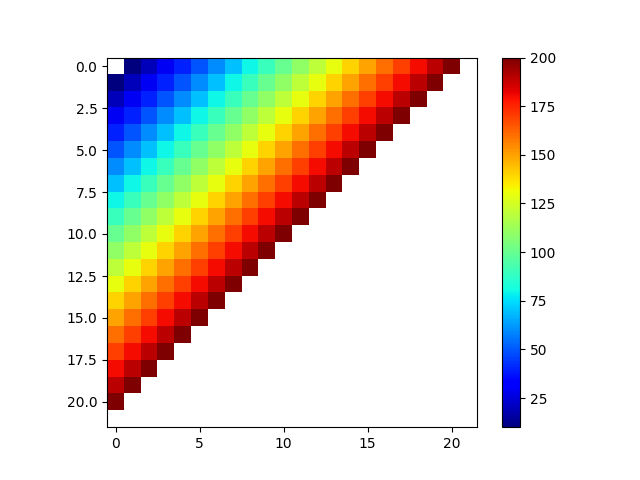

In [48]:
figc,axc =plt.subplots()

Time_float = vectorized_float(Inductor_Sending_Time)

Time_float = delete_alternating(Time_float)

Time_float_masked = np.ma.masked_where(Time_float == 0, Time_float)

c = plt.imshow(Time_float_masked,cmap=cm.jet)
plt.colorbar(c)

In [49]:
Voltage_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Inductor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

Voltage_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))
Current_Accumulation_Capacitor = np.full((2*(Merge_Full.Number_of_Layers+1),2*(Merge_Full.Number_of_Layers+1)),Decimal('0'))

for layer_number in range(0,Merge_Full.Number_of_Layers):
        ## Reset Centre Index    
        Centre_Index_x = 2*layer_number
        Centre_Index_y = 0
        
        for node_number in range(0,layer_number+1):
                # Inductor
                Away_Index_Inductor_x = Centre_Index_x + 1
                Away_Index_Inductor_y = Centre_Index_y
                
                Return_Index_Inductor_x = Centre_Index_x - 1
                Return_Index_Inductor_y = Centre_Index_y
                
                # Capacitor
                Away_Index_Capacitor_x = Centre_Index_x 
                Away_Index_Capacitor_y = Centre_Index_y + 1
                
                Return_Index_Capacitor_x = Centre_Index_x 
                Return_Index_Capacitor_y = Centre_Index_y - 1

                if(node_number == 0 and layer_number ==0): 
                        # Origin Node
                        # Inductor, Origin node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        
                        # Capacitor, Origin node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 

                elif(node_number == 0 ): 
                        # First Node
                        # Inductor, First Node = Both Merging 
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, First Node = Away only
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y]

                elif(node_number == layer_number): 
                        # Last Node
                        # Inductor, Last Node = Away only
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y]
                         
                        # Capacitor, Last Node = Both Merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y]) 
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                else:
                        # General Node
                        # Inductor, General Node = Both merging
                        Voltage_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Voltage_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        Current_Accumulation_Inductor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Inductor_x,Away_Index_Inductor_y] + Current_Return[Return_Index_Inductor_x,Return_Index_Inductor_y]) 
                        
                        # Capacitor, General Node = Both merging
                        Voltage_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Voltage_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Voltage_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        Current_Accumulation_Capacitor[Centre_Index_x,Centre_Index_y] = (Current_Away[Away_Index_Capacitor_x,Away_Index_Capacitor_y] + Current_Return[Return_Index_Capacitor_x,Return_Index_Capacitor_y])
                        
                Centre_Index_x -= 2
                Centre_Index_y += 2
                

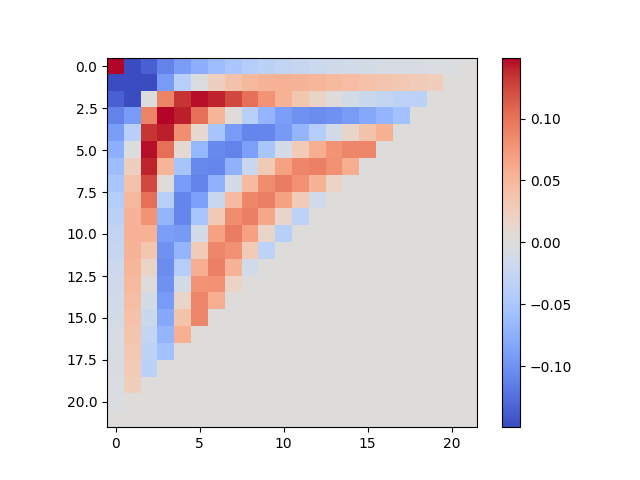

In [50]:
fig1,ax1 = plt.subplots()
Voltage_Inductor = delete_alternating(vectorized_float(Voltage_Accumulation_Inductor))

Voltage_Contrast = copy.copy(Voltage_Inductor)
Voltage_Contrast[0,0] = 0
max_boundary = np.max(Voltage_Contrast)  

c = plt.imshow(Voltage_Inductor,cmap=cm.coolwarm,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

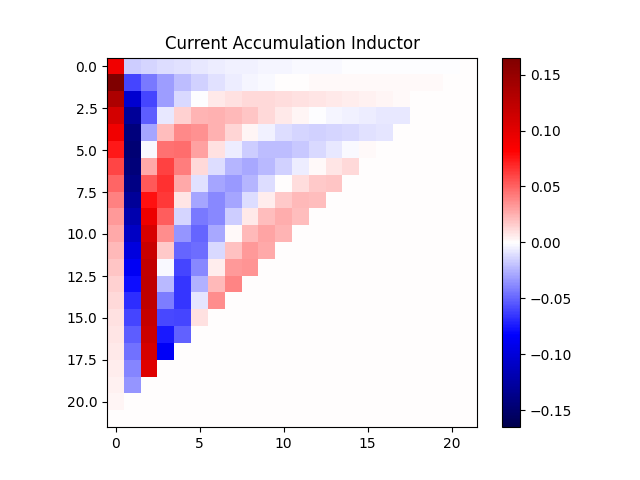

In [51]:
fig2,ax2 = plt.subplots()
plt.title("Current Accumulation Inductor")
Current_Inductor = delete_alternating(vectorized_float(Current_Accumulation_Inductor))
max_boundary = np.max(Current_Inductor)  

c = plt.imshow(Current_Inductor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

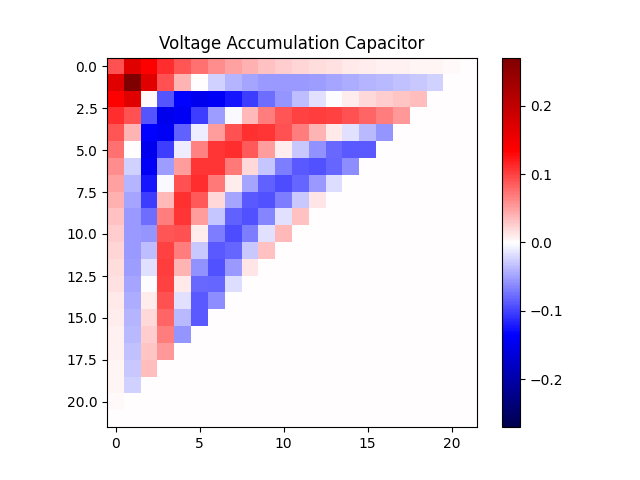

In [52]:
fig3,ax3 = plt.subplots()
plt.title("Voltage Accumulation Capacitor")
Voltage_Capacitor = delete_alternating(vectorized_float(Voltage_Accumulation_Capacitor))
max_boundary = np.max(Voltage_Capacitor)  

c = plt.imshow(Voltage_Capacitor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

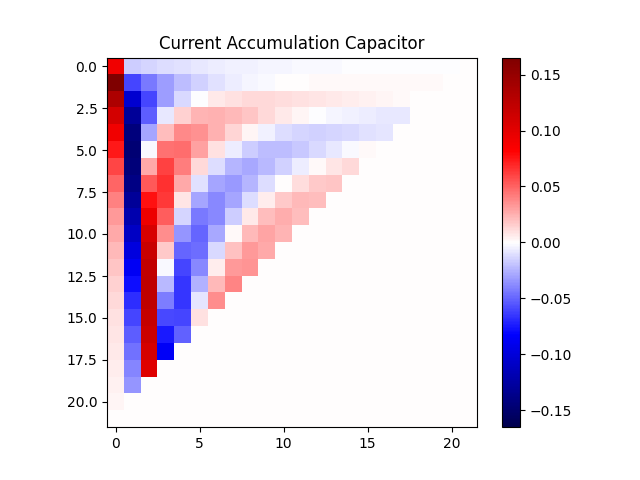

In [53]:
fig4,ax4 = plt.subplots()
plt.title("Current Accumulation Capacitor")
Current_Capacitor = delete_alternating(vectorized_float(Current_Accumulation_Capacitor))
max_boundary = np.max(Current_Capacitor)  

c = plt.imshow(Current_Capacitor,cmap=cm.seismic,vmax =max_boundary, vmin = - max_boundary)
plt.colorbar(c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Nx,Ny = Voltage_Capacitor.shape
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Voltage_Capacitor,cmap=cm.coolwarm)

# Higher Order Merging

## Demonstrating co-factors and LCM -> array index 

In [54]:
Merge_Full.LCM

Decimal('10')

In [55]:
Merge_Full.GCD

Decimal('10')

In [56]:
Merge_Full.Inductor_LCM_Factor

1

In [57]:
Merge_Full.Capacitor_LCM_Factor

1

In [58]:
a = Merge_Full.Inductor_LCM_Factor
b = Merge_Full.Capacitor_LCM_Factor

In [59]:
Time_float[a,0]

10.0

In [60]:
Time_float[0,b]

10.0

## Functions for routine

In [61]:
def make_upper_and_lower(arr,b_factor):
    upper = arr[:,0:b_factor]
    lower = arr[:,b_factor:]
    
    padding_for_upper = np.full(lower.shape,0,dtype=lower.dtype)
    padding_for_lower = np.full(upper.shape,0,dtype=upper.dtype)
    
    upper= np.append(upper,padding_for_upper,axis=1)
    lower= np.append(lower,padding_for_lower,axis=1)
    
    return upper,lower

In [62]:
upper_voltage_capacitor,lower_voltage_capacitor = make_upper_and_lower(Voltage_Capacitor,b)

upper_time, lower_time = make_upper_and_lower(Time_float,b)

In [63]:
upper_time[0,b-1]

0.0

In [64]:
lower_time[0,0]

10.0

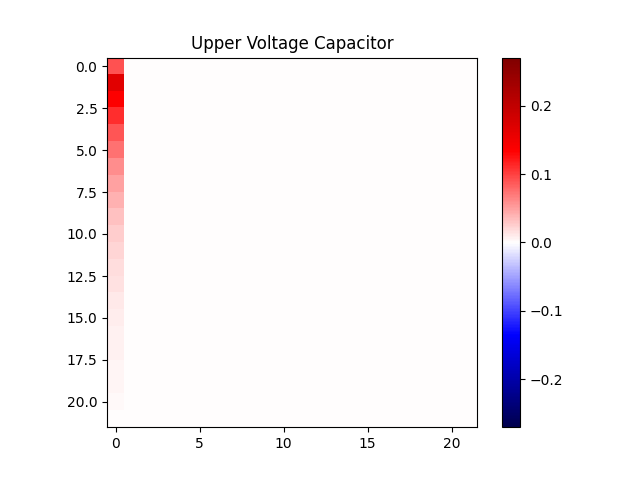

In [65]:
figcu,axcu =plt.subplots()

max_voltage_capacitor = np.max(Voltage_Capacitor)  
plt.title("Upper Voltage Capacitor")
c = plt.imshow(upper_voltage_capacitor,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

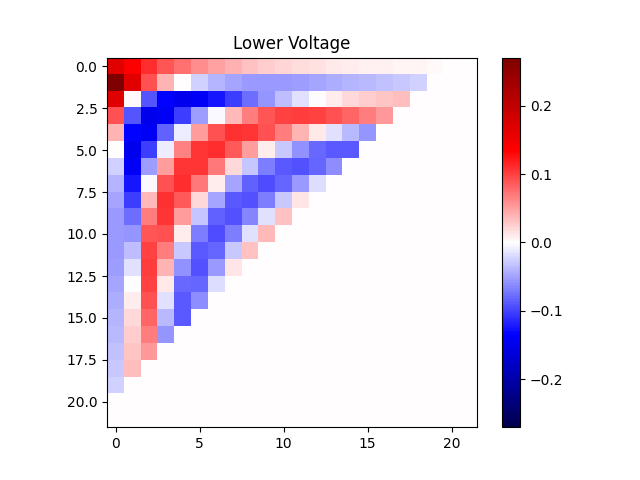

In [66]:
figclvc,axclvc =plt.subplots()

plt.title("Lower Voltage")
c = plt.imshow(lower_voltage_capacitor,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [67]:
def shif_and_pad_array_x(arr,number_lines):
    
    rolled_arr = np.roll(arr, number_lines, axis=0)
    
    left_arr = rolled_arr[0:number_lines,:]
    left_arr = np.full(left_arr.shape,0,dtype=left_arr.dtype)
    
    
    rolled_arr= np.delete(rolled_arr,np.arange(0,number_lines,1),axis=0)
    rolled_arr = np.append(left_arr,rolled_arr,axis=0)
    
    return rolled_arr

In [68]:
voltage_capacitor_merge_ready = shif_and_pad_array_x(lower_voltage_capacitor,a)

time_merge_ready = shif_and_pad_array_x(lower_time,a)

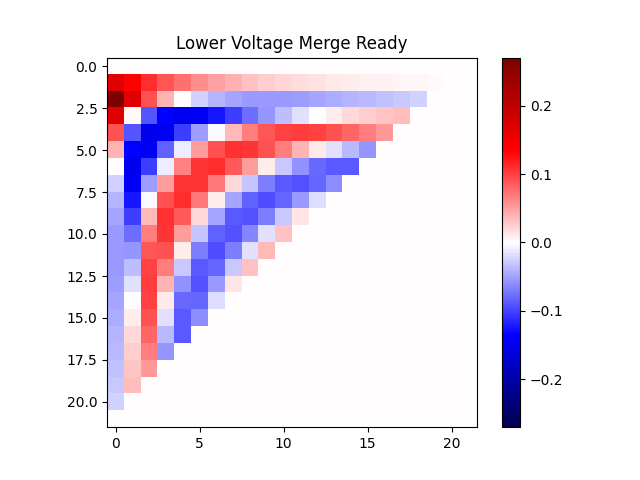

In [69]:
figclvmr,axclvmr =plt.subplots()

plt.title("Lower Voltage Merge Ready")
c = plt.imshow(voltage_capacitor_merge_ready,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

check if merge ready correspond in arrival time

In [70]:
upper_time[a+5,2]

0.0

In [71]:
time_merge_ready[a+5,2]

80.0

In [72]:
voltage_capacitor_merged = voltage_capacitor_merge_ready + upper_voltage_capacitor

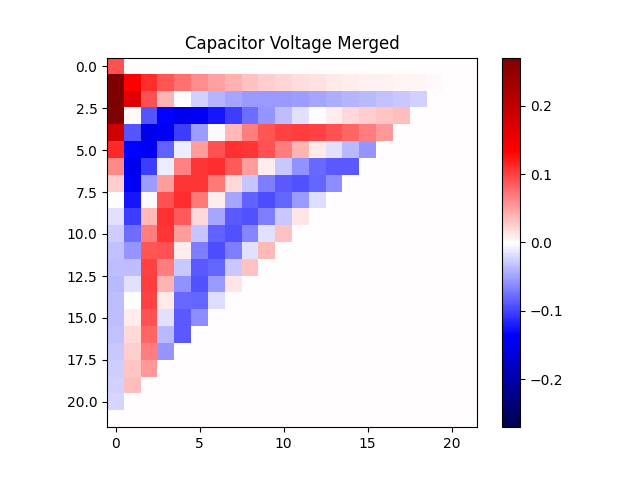

In [73]:
figclvm,axclvm =plt.subplots()

plt.title("Capacitor Voltage Merged")
c = plt.imshow(voltage_capacitor_merged,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [74]:
def multiplicative_merging(arr,a_factor,b_factor):
    upper_arr,lower_arr = make_upper_and_lower(arr,b_factor)
    arr_merge_ready = shif_and_pad_array_x(lower_arr,a_factor)
    
    arr_merged = upper_arr + arr_merge_ready
    
    return arr_merged

test multiplicative_merging, should produce blank image

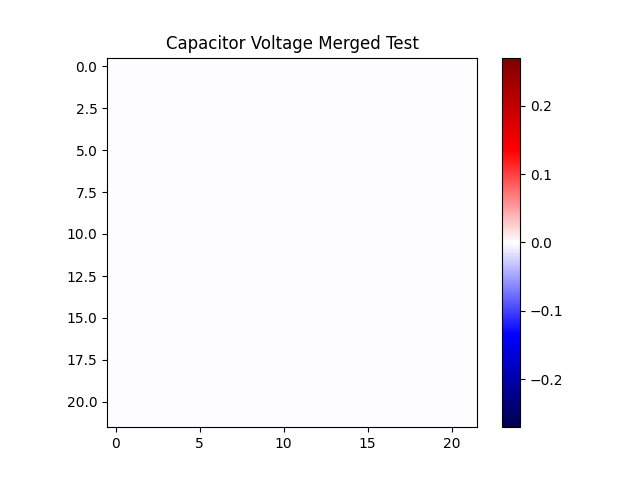

In [75]:
voltage_capacitor_merged_test = multiplicative_merging(Voltage_Capacitor,a,b)

voltage_capacitor_merged_test = voltage_capacitor_merged_test - voltage_capacitor_merged

figclvmt,axclvmt =plt.subplots()

axclvmt.set_title("Capacitor Voltage Merged Test")
c = axclvmt.imshow(voltage_capacitor_merged_test,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
figclvmt.colorbar(c)

2 layers of merging

In [76]:
voltage_capacitor_merged = multiplicative_merging(Voltage_Capacitor,a,b)

number_merge_cycles = math.ceil(Merge_Full.Number_of_Layers/Merge_Full.Capacitor_LCM_Factor)

for _ in range (0,number_merge_cycles):
    voltage_capacitor_merged = multiplicative_merging(voltage_capacitor_merged,a,b)
    
print(number_merge_cycles)

21


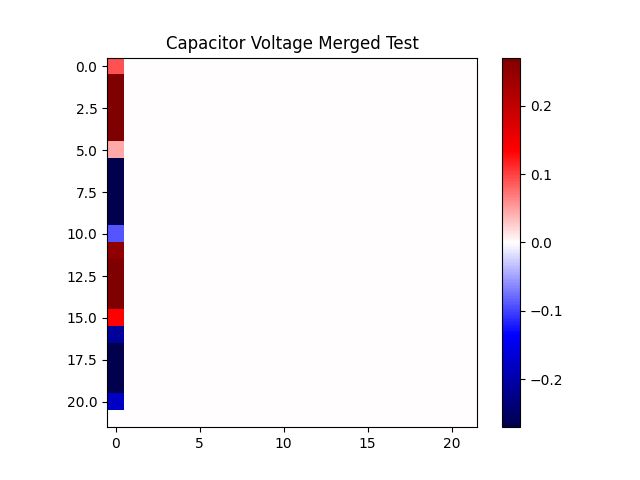

In [77]:
figclvmt,axclvmt =plt.subplots()

plt.title("Capacitor Voltage Merged Test")
c = plt.imshow(voltage_capacitor_merged,cmap=cm.seismic,vmax =max_voltage_capacitor, vmin = - max_voltage_capacitor)
plt.colorbar(c)

In [78]:
series = voltage_capacitor_merged[0:-1,0]
time = Time_float[0:-1,0]

## plot time series

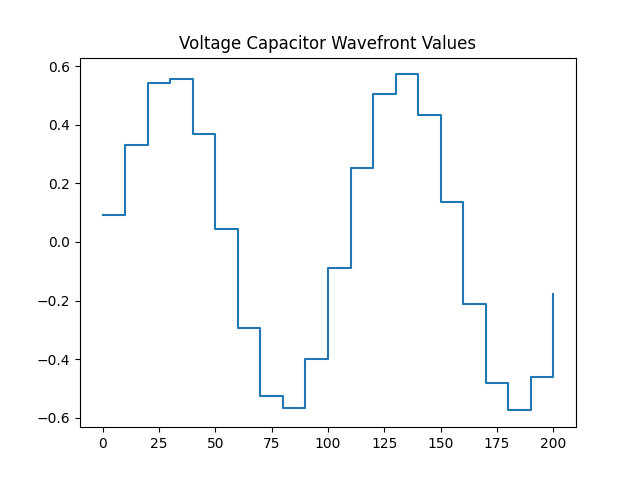

In [79]:
fig_series,ax_sereis =plt.subplots()

plt.title("Voltage Capacitor Wavefront Values")
plt.step(time,series,where='post')


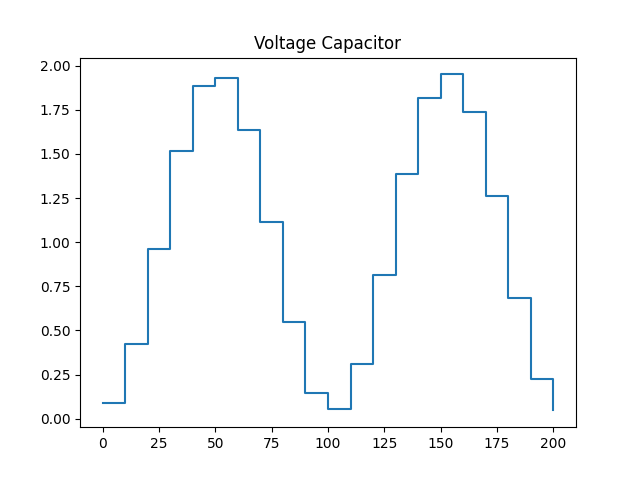

In [80]:
integrated_series = np.cumsum(series)  

fig_integrated_series,ax_integrated_sereis =plt.subplots()

plt.title("Voltage Capacitor")
plt.step(time,integrated_series,where='post')
  